In [1]:
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt
import numpy
import matplotlib.patches as mpatches

In [2]:
#create file paths for both city and ride data
city_path = os.path.join('Resources','city_data.csv')
ride_path = os.path.join('Resources','ride_data.csv')

#open and read files, append to new lists
#ride_labels = ['Ride ID','City','Date','Fare']
ride_city = []
ride_date = []
ride_fare = []
ride_id = []
with open (ride_path) as ride_file:
    ride_data = csv.reader(ride_file, delimiter = ',')
    header = next(ride_data)
    for row in ride_data:
        ride_city.append(row[0])
        ride_date.append(row[1])
        ride_fare.append(float(row[2]))
        ride_id.append(int(row[3]))

#city_labels = ['City','Driver Count','Type']
city_name = []
city_drivercount = []
city_type = []
with open (city_path) as city_file:
    city_data = csv.reader(city_file, delimiter = ',')
    header = next(city_data)
    for row in city_data:
        city_name.append(row[0])
        city_drivercount.append(int(row[1]))
        city_type.append(row[2])

In [3]:
ride_records = [('Ride ID',ride_id),('City',ride_city),('Date',ride_date),('Fare',ride_fare)]
ride_df = pd.DataFrame.from_items(ride_records)
ride_df.head(3)

,Ride ID,City,Date,Fare
0,5739410935873,Lake Jonathanshire,2018-01-14 10:14:22,13.83
1,2343912425577,South Michelleport,2018-03-04 18:24:09,30.24
2,2005065760003,Port Samanthamouth,2018-02-24 04:29:00,33.44


In [4]:
city_records = [('City',city_name),('Driver Count',city_drivercount),('Type',city_type)]
city_df = pd.DataFrame.from_items(city_records)
city_df = city_df.sort_values(by='City')
city_df.head(3)

,City,Driver Count,Type
61,Amandaburgh,12,Urban
9,Barajasview,26,Urban
90,Barronchester,11,Suburban


In [5]:
#Create series for each of the 4 variables needed for bubble plot
fare_average = ride_df.groupby(['City']).mean()['Fare'].rename('Average Fare ($) Per City')
total_rides = ride_df.groupby(['City']).count()['Fare'].rename('Total Number of Rides Per City')
total_drivers = city_df.groupby(['City']).sum()['Driver Count'].rename('Driver Count')
city_type = city_df[['City','Type']].set_index('City')

partial_pd = pd.DataFrame({'Average Fare':fare_average,'Total Number of Rides':total_rides,'Total Drivers':total_drivers})
final_pd = pd.concat([partial_pd,city_type], axis = 1)
bubble_pd = final_pd.round(2)
bubble_pd['Average Fare'] = bubble_pd['Average Fare'].map("${:,.2f}".format)
final_pd

,Average Fare,Total Drivers,Total Number of Rides,Type
City,,,,
Amandaburgh,24.641667,12,18,Urban
Barajasview,25.332273,26,22,Urban
Barronchester,36.422500,11,16,Suburban
Bethanyland,32.956111,22,18,Suburban
Bradshawfurt,40.064000,7,10,Rural
Brandonfort,35.437368,10,19,Suburban
Carriemouth,28.314444,52,27,Urban
Christopherfurt,24.501852,41,27,Urban
Colemanland,30.894545,23,22,Suburban


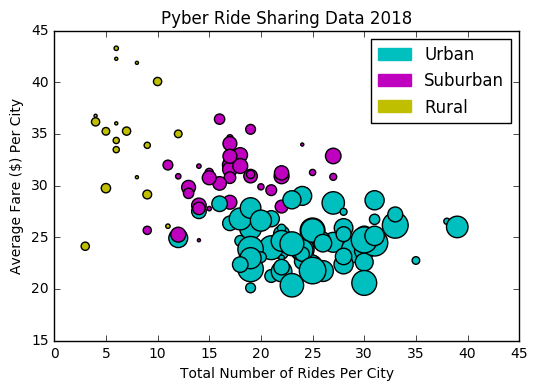

In [6]:
#create bubble plot colors
colors = ['c','m','y']

def attribute_color(type):
    colors = {'Urban':'c', 'Suburban':'m','Rural':'y'}
    return colors.get(type)

assign = []
for index, row in bubble_pd.iterrows():
    assign.append(attribute_color(row['Type']))


bubble_plt = plt.scatter(total_rides, fare_average, s=total_drivers*5, marker = 'o', c=assign)
plt.xlabel('Total Number of Rides Per City')
plt.ylabel('Average Fare ($) Per City')

#build legend
cyan = mpatches.Patch(color='c', label='Urban')
magenta = mpatches.Patch(color='m', label='Suburban')
yellow = mpatches.Patch(color='y', label='Rural')
# set up for handles declaration
patches = [cyan,magenta, yellow]
# define and place the legend
plt.legend(handles=patches,loc='upper right')

plt.title('Pyber Ride Sharing Data 2018')
plt.savefig('Output\\PyberPlot.PNG')
plt.show()

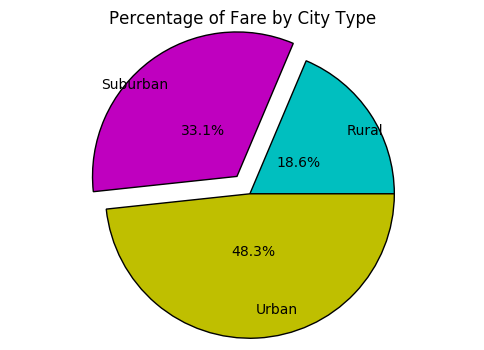

In [7]:
#create pie chart that shows percentage of average fares by city type
fare_pie = final_pd.groupby(['Type']).sum()['Average Fare']
fare_pd = pd.DataFrame(fare_pie)
fare_pd

plt.pie(fare_pd['Average Fare'], labels = ['Rural','Suburban','Urban'], colors = ['c','m','y'], explode = (0,0.15,0), autopct='%1.1f%%', pctdistance = 0.4, labeldistance = 0.8)
plt.axis('equal')
plt.title('Percentage of Fare by City Type')
plt.savefig('Output\\FarePercentage.png')
plt.show()


          Total Number of Rides
Type                           
Rural                       125
Suburban                    625
Urban                      1625


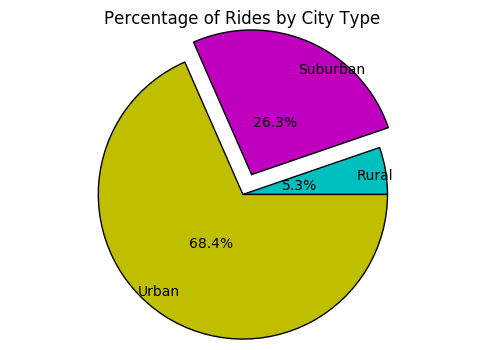

In [8]:
#create pie chart that shows percentage of total rides by city type
ride_pie = final_pd.groupby(['Type']).sum()['Total Number of Rides']
rides_pied = pd.DataFrame(ride_pie)
print(rides_pied)

plt.pie(rides_pied['Total Number of Rides'], labels = ['Rural','Suburban','Urban'], colors = ['c','m','y'], explode = (0,0.15,0), autopct='%1.1f%%', pctdistance = 0.4, labeldistance = 0.8)
plt.axis('equal')
plt.title('Percentage of Rides by City Type')
plt.savefig('Output\\RidePercentage.png')
plt.show()


          Total Drivers
Type                   
Rural                78
Suburban            490
Urban              2405


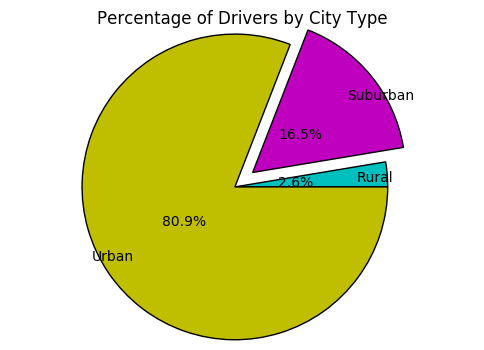

In [9]:
#create pie chart that shows percentage of total drivers by city type
ride_pie = final_pd.groupby(['Type']).sum()['Total Drivers']
rides_pied = pd.DataFrame(ride_pie)
print(rides_pied)

plt.pie(rides_pied['Total Drivers'], labels = ['Rural','Suburban','Urban'], colors = ['c','m','y'], explode = (0,0.15,0), autopct='%1.1f%%', pctdistance = 0.4, labeldistance = 0.8)
plt.axis('equal')
plt.title('Percentage of Drivers by City Type')
plt.savefig('Output\\DriversPercentage.png')
plt.show()
